In [1]:
from base_import import *

In [2]:
df = pd.read_csv('Data/Real_estate.csv')

In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

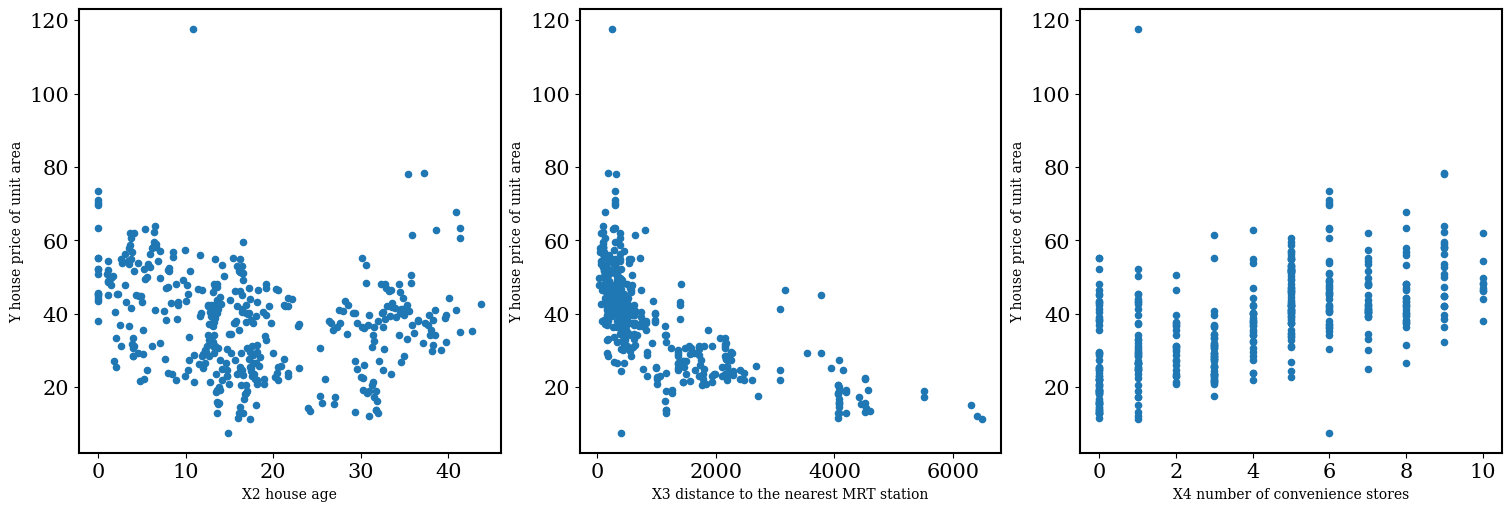

In [8]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])

In [15]:
def generate_model(X, Y, order):

    x_array = np.linspace(X.min(), X.max(), 1000)

    coeffs = np.polyfit(X, Y, order)

    model = np.poly1d(coeffs)

    y_array = model(x_array)

    return x_array, y_array

In [9]:
coeffs = np.polyfit(df['X2 house age'], df['Y house price of unit area'], 1)
y_1  = np.poly1d(coeffs)

In [20]:
X1, Y1 = generate_model(df['X2 house age'], df['Y house price of unit area'], 2)
X2, Y2 = generate_model(df['X3 distance to the nearest MRT station'], df['Y house price of unit area'], 1)
X3, Y3 = generate_model(df['X4 number of convenience stores'], df['Y house price of unit area'], 1)

In [22]:
X2 = 'X2 house age'
X3 = 'X3 distance to the nearest MRT station'
X4 = 'X4 number of convenience stores'
Y = 'Y house price of unit area'

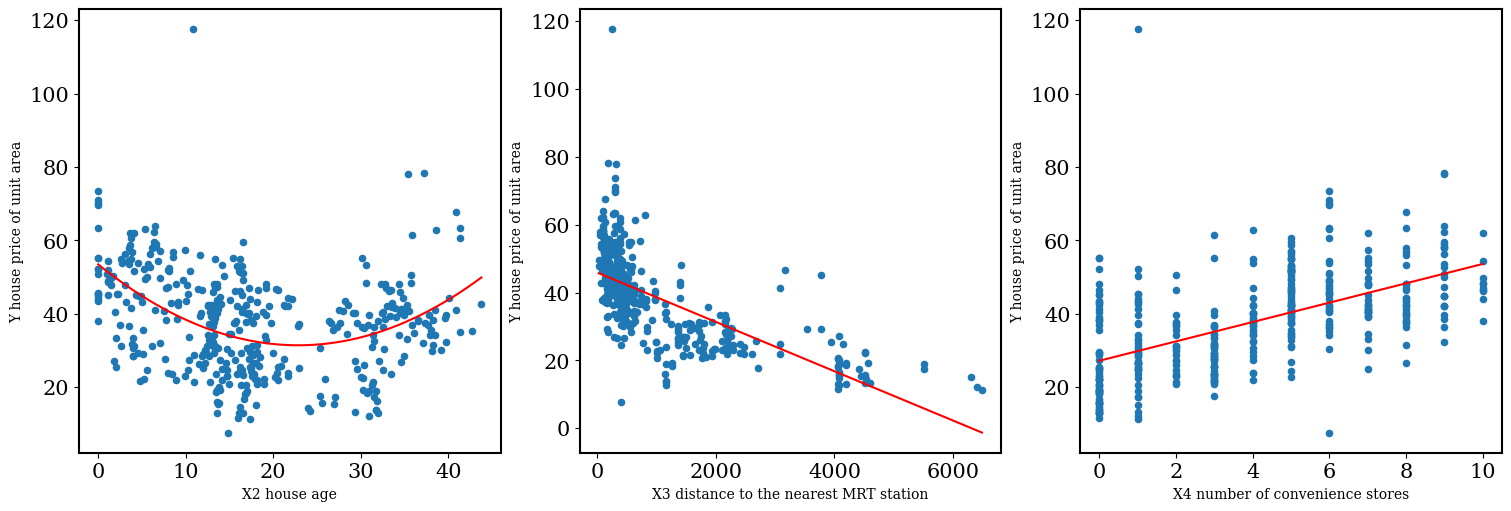

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
ax[0].plot(X1, Y1, color = 'red')
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
ax[1].plot(X2, Y2, color = 'red')
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])
ax[2].plot(X3, Y3, color = 'red')


In [34]:
def fitting_1d_KNN(X, Y, n_neighbors):
    
    x_fine = np.linspace(X.min(), X.max(), 1000)

    transform_x = X.reshape(-1, 1)
    transform_y = Y.reshape(-1, 1)

    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(transform_x, transform_y)

    y_fine = knn_regressor.predict(x_fine)

    return x_fine, y_fine

In [25]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(df[X2].to_numpy().reshape(-1, 1), df[Y].to_numpy().reshape(-1, 1))

KNeighborsRegressor()

In [36]:
x, y = fitting_1d_KNN(df[X2].to_numpy(), df[Y].to_numpy(), 50)

NameError: name 'knn' is not defined

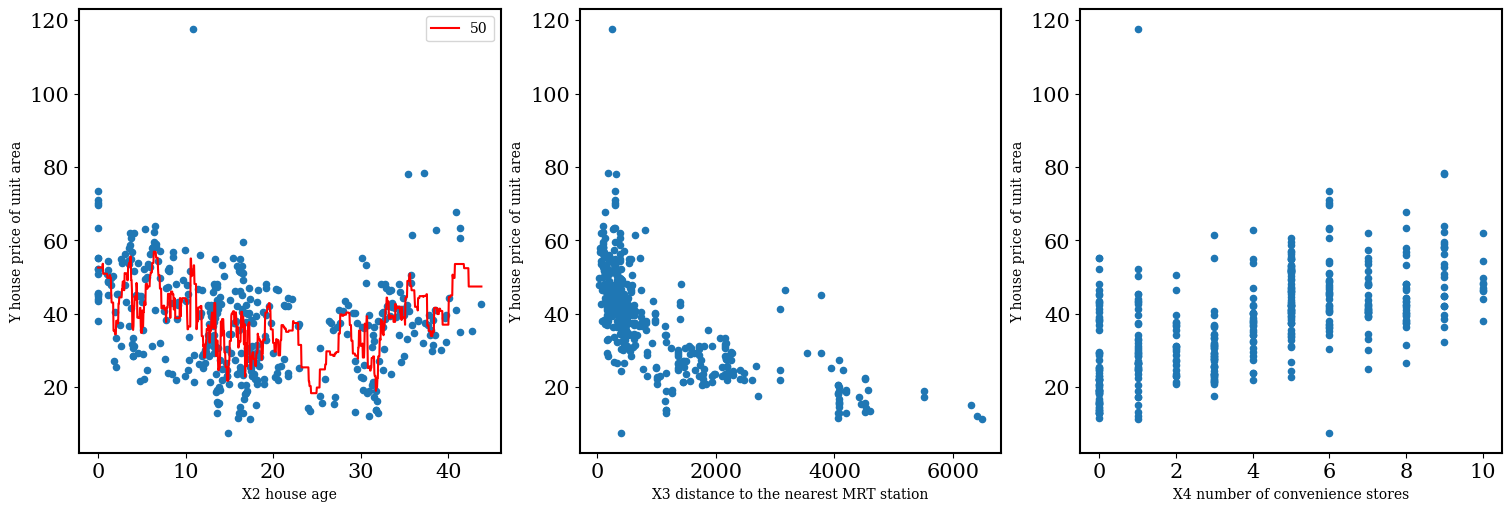

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (15, 5), constrained_layout = True)

df.plot(x = 'X2 house age', y = 'Y house price of unit area', kind = 'scatter', ax = ax[0])
ax[0].plot(x.flatten(), y.flatten(), color = 'red', label = 'k = 50')
df.plot(x = 'X3 distance to the nearest MRT station', y = 'Y house price of unit area', kind = 'scatter', ax = ax[1])
#ax[1].plot(X2, Y2, color = 'red')
df.plot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', kind = 'scatter', ax = ax[2])
#ax[2].plot(X3, Y3, color = 'red')
ax[0].legend()